importing library


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [3]:
#importing the dataset
df=pd.read_csv('Crop_recommendation.csv')
df.head()
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [8]:
# Check for missing values in each column
print(df.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


Seperating features and target label

In [10]:
features=df[['N','P','K','temperature', 'humidity','ph', 'rainfall']]
target = df['label']
labels = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

RandomForest classifier


In [21]:

RF_model=RandomForestClassifier(n_estimators=40,random_state=0)
RF_model.fit(X_train,Y_train)
Y_pred=RF_model.predict(X_test)
random_accu_score= accuracy_score(Y_test,Y_pred)
print(f"Accuracy score is {random_accu_score}")
print(classification_report(Y_test,Y_pred))

Accuracy score is 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

saving pickle file

In [12]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)


In [13]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF_model.predict(data)
print(prediction)

['coffee']


c:\Users\labou\anaconda3\crop_recomendation\crop_recond_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF_model.predict(data)
print(prediction)

['jute']


c:\Users\labou\anaconda3\crop_recomendation\crop_recond_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
error_rate=[]

for i in range(1,100):
    RF_model=RandomForestClassifier(n_estimators=i,random_state=0)
    RF_model.fit(X_train,Y_train)
    Y_pred=RF_model.predict(X_test)
    error_rate.append(np.mean(Y_pred!=Y_test))

Text(0, 0.5, 'Error Rate')

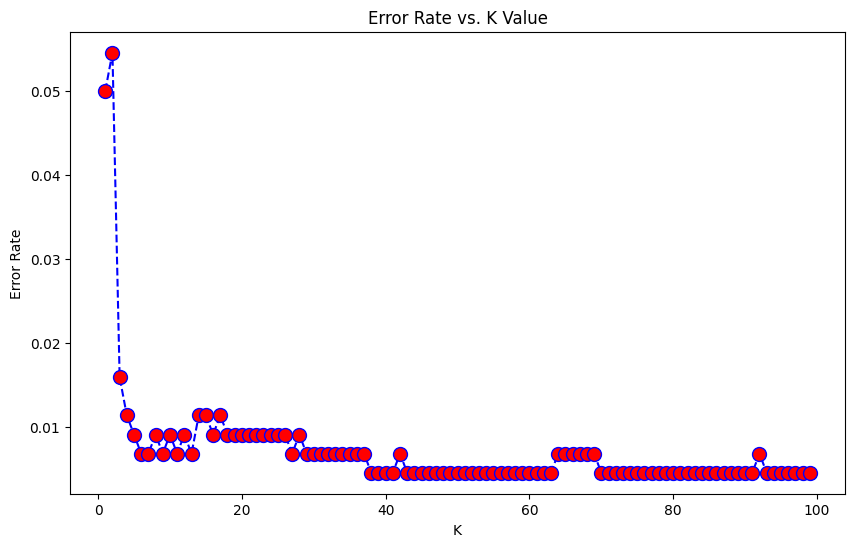

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100), error_rate,  linestyle='dashed', color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')